In [6]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [7]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 1
fig_dims = (5, 4)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

fig_name = 'graph_sensitivity'

In [8]:
''' Stage Size: Load data from file. '''
csv_path = './sec7/stagesize.csv'
workload_list = ['mix1', 'mix2', 'mix3', 'mix4']
scheme_list = ['32MB Performance', '64MB Performance', '128MB Performance']
workload_dict = {item: item for item in workload_list}
stagesize_scheme_dict = {
    '32MB Performance': '32 MB',
    '64MB Performance': 'Baryon (64 MB)',
    '128MB Performance': '128 MB'
    }

stagesize_title = 'Norm. Performance'
fig_name = 'GC breakdown'
fig_path = './4.2.2/'
stagesize_ylim = (0, 1.6)
stagesize_yticks = list(np.arange(stagesize_ylim[0], stagesize_ylim[1]+0.01, 0.2))
stagesize_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 0, 5]]
assert len(stagesize_bar_colors) == len(stagesize_scheme_dict)

# pprint(stagesize_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
stagesize_xlabels = []
stagesize_xticks = []
stagesize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in stagesize_scheme_dict):
                row_value.append(row[col])
        stagesize_data_2darr.append(row_value)
        stagesize_xlabels.append(workload_fullname)
        xtick += 1
        stagesize_xticks.append(xtick)
assert len(stagesize_data_2darr) == len(stagesize_xlabels) == len(stagesize_xticks)

pprint(stagesize_data_2darr)

''' Layout hit rate '''
layout_scheme_list = ['32MB Layout', '64MB Layout', '128MB Layout']
layout_scheme_dict = {
    '32MB Layout': '32 MB Layout Hit Rate',
    '64MB Layout': 'Baryon 64 MB Layout Hit Rate',
    '128MB Layout': '128 MB Layout Hit Rate'
}
csv_hd = pd.read_csv(csv_path, sep=',')
layout_xlabels = []
layout_xticks = []
layout_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in layout_scheme_dict):
                row_value.append(row[col])
        layout_data_2darr.append(row_value)
        layout_xlabels.append(workload_fullname)
        xtick += 1
        layout_xticks.append(xtick)
assert len(layout_data_2darr) == len(layout_xlabels) == len(layout_xticks)

pprint(layout_data_2darr)

[[0.78, 1.0, 1.1], [0.93, 1.0, 1.038], [0.828, 1.0, 1.06], [0.9961, 1.0, 1.03]]
[[0.682, 0.7809999999999999, 0.8140000000000001],
 [0.6524, 0.7140000000000001, 0.78225],
 [0.5869, 0.708, 0.7225],
 [0.6287, 0.751875, 0.7829999999999999]]


[-0.16666666666666666, 0, 0.16666666666666666]
[0.8333333333333334, 1, 1.1666666666666667]
[1.8333333333333333, 2, 2.1666666666666665]
[2.8333333333333335, 3, 3.1666666666666665]


NameError: name 'repl_ax' is not defined

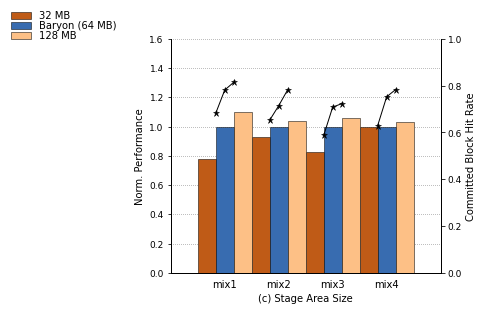

In [9]:
''' stage size plot '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
stagesize_ax = fig.add_subplot(1 ,1 ,1)
stagesize_ax2 = stagesize_ax.twinx()
easypyplot.format.turn_off_box(stagesize_ax, twinx_axes=stagesize_ax2)
stagesize_h = easypyplot.barchart.draw(
    stagesize_ax, stagesize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=stagesize_xlabels,
    xticks=stagesize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft,
    colors=stagesize_bar_colors)
stagesize_h2 = []
# easypyplot.format.turn_off_box(ax2)
for group_id in range(len(workload_dict)):
    # layout_xticks = list(np.arange(fig_xticks[group_id] - 1/3))
    gap = 1./3 - 1.0 * fig_bar_width / 6
    layout_xticks = [stagesize_xticks[group_id] - gap, stagesize_xticks[group_id], stagesize_xticks[group_id] + gap]
    print(layout_xticks)
    stagesize_h2 += stagesize_ax2.plot(layout_xticks, layout_data_2darr[group_id],
                marker='*',
                linewidth = '1.0',
                color = '#000000',
                markersize = '7.0',
                # prop = ft
                )
''' x axis '''
stagesize_ax.set_xlim([stagesize_ax.get_xticks()[0] - 1, stagesize_ax.get_xticks()[-1] + 1])
stagesize_ax.set_xticks(stagesize_xticks)
stagesize_ax.set_xticklabels(stagesize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
stagesize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# stagesize_ax.tick_params(direction='in') # [in, out, inout]
stagesize_ax.set_xlabel('(c) Stage Area Size', fontproperties=ft)
''' y axis '''
stagesize_ax.yaxis.grid(True)
stagesize_ax.set_ylim(stagesize_ylim)
stagesize_ax.set_yticks(stagesize_yticks)
stagesize_ax.set_ylabel(stagesize_title, multialignment='center', fontproperties=ft)
stagesize_ax2.set_ylim([0., 1.])
stagesize_ax2.set_ylabel('Committed Block Hit Rate', multialignment='center', fontproperties=ft)
''' legend '''
legend = [stagesize_scheme_dict[item] for item in stagesize_scheme_dict]
fig.legend(stagesize_h, legend, loc='right', bbox_to_anchor=(0, 1),
        ncol=1, frameon=False, prop=ft, columnspacing=0.3, labelspacing=0)

# ''' last resize '''
# # fig.subplots_adjust(hspace=1)
plt.tight_layout(w_pad=1.5, h_pad=2.75)
# easypyplot.format.resize_ax_box(repl_ax, hratio=0.8)
# easypyplot.format.resize_ax_box(sbsize_ax, hratio=0.8)
# easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.8)
# easypyplot.format.resize_ax_box(cfr_ax, hratio=0.8)


In [ ]:
''' Save figures'''
fig.savefig(fig_path + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures